In [1]:
##Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import xgboost

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Read data from csv

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Concatenate train and test data

In [5]:
data=pd.concat((train, test)).reset_index(drop=True)

In [6]:
data.shape

(2919, 81)

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Correlation

<AxesSubplot:>

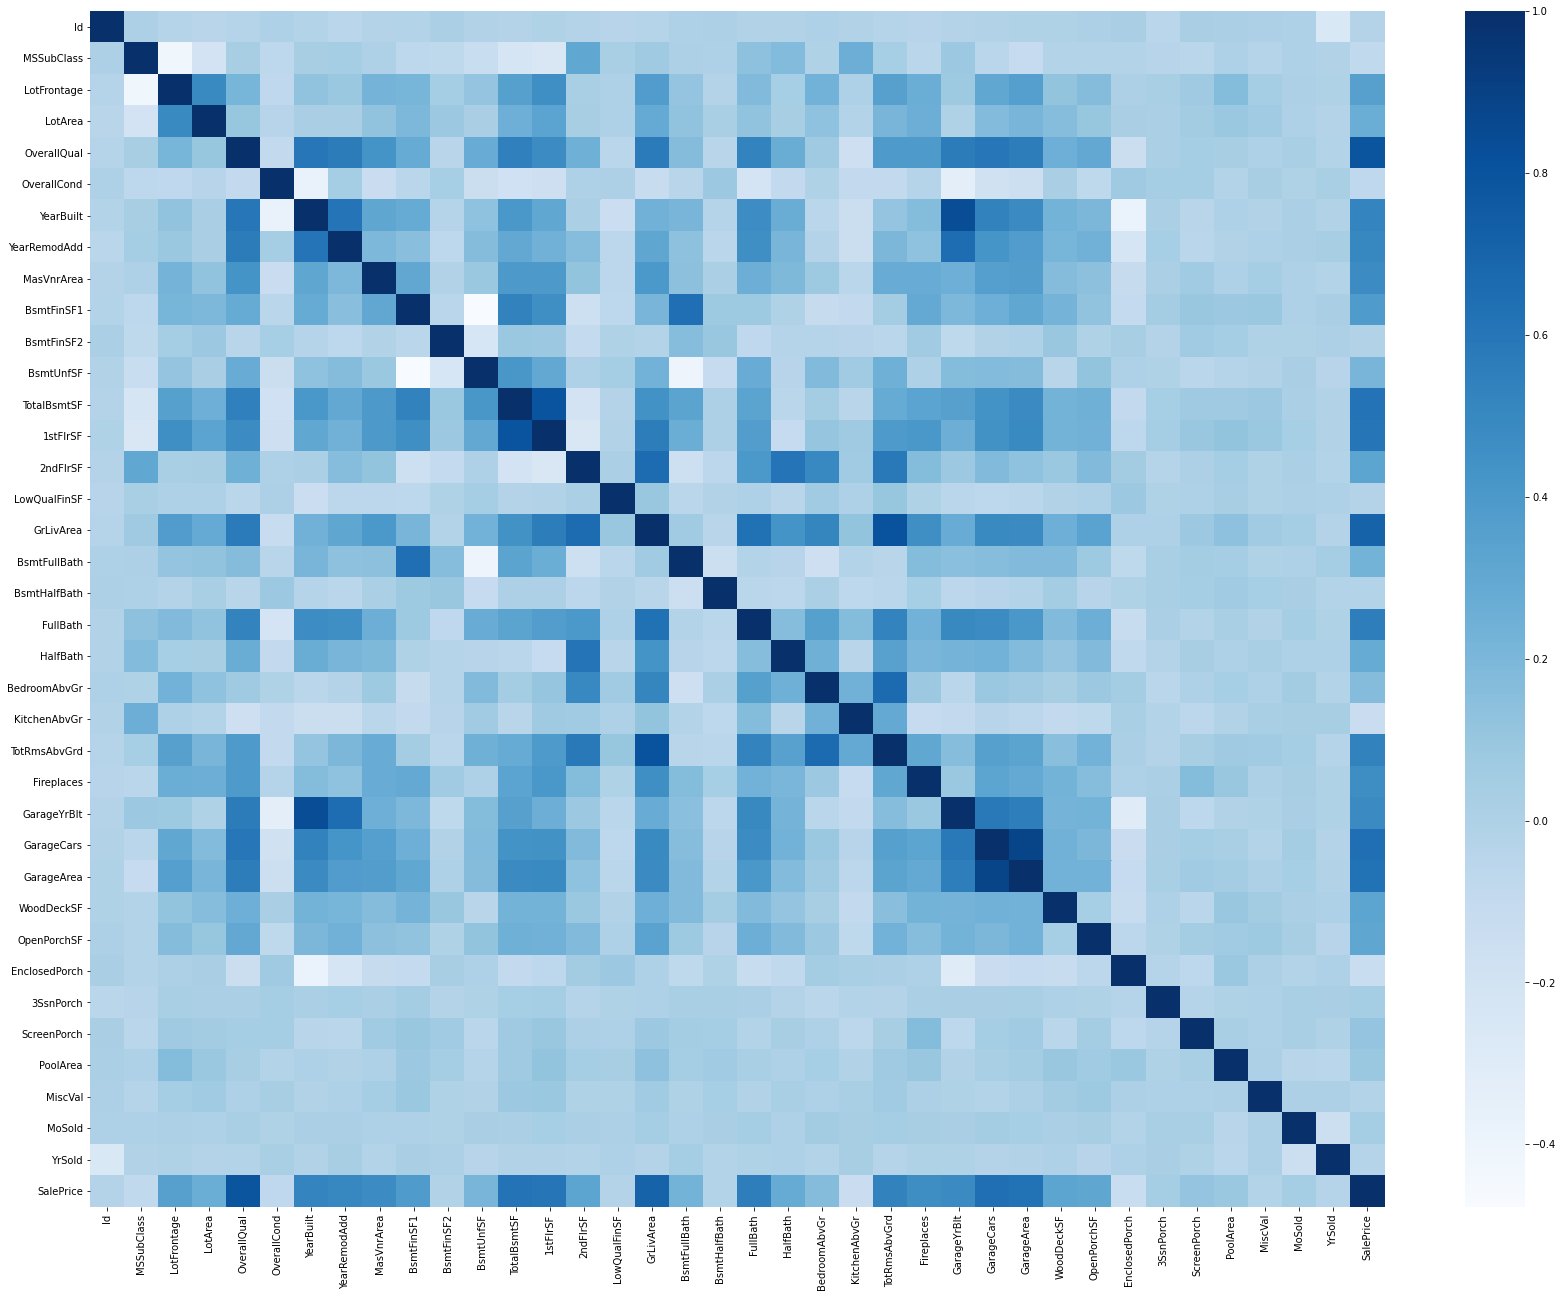

In [8]:
plt.figure(figsize=(29,22)) 
sns.heatmap(data.corr(), cmap='Blues',)

# Deal with null values

In [9]:
data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
Foundation          0
Id                  0
Length: 81, dtype: int64

Plot missing values

<AxesSubplot:>

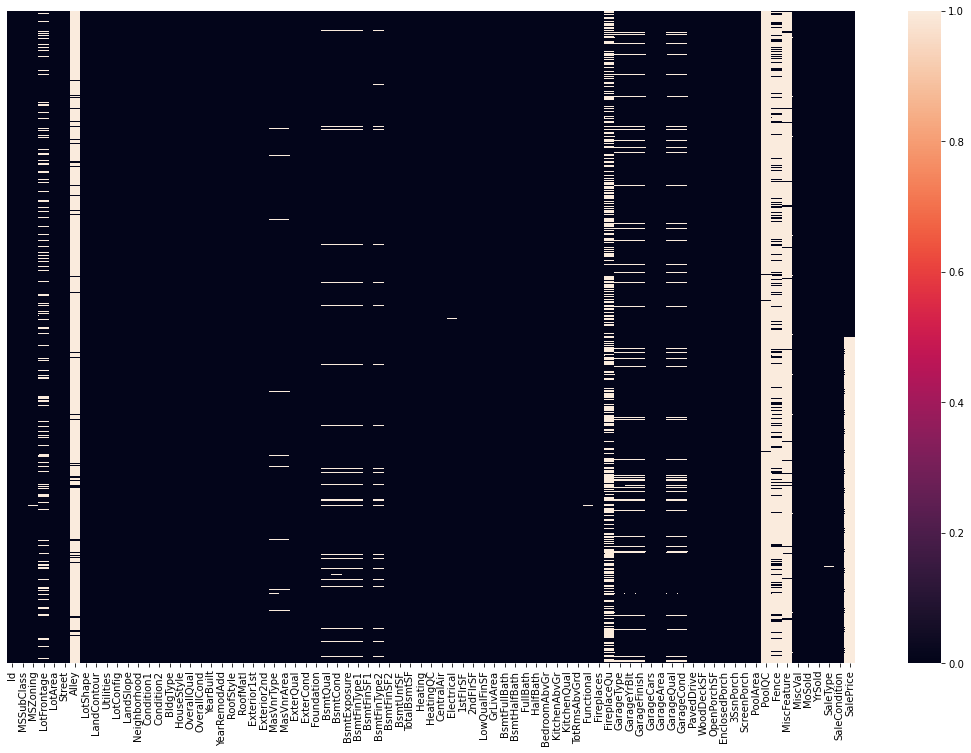

In [10]:
plt.figure(figsize=(19,12)) 
sns.heatmap(data.isnull(),yticklabels=False)

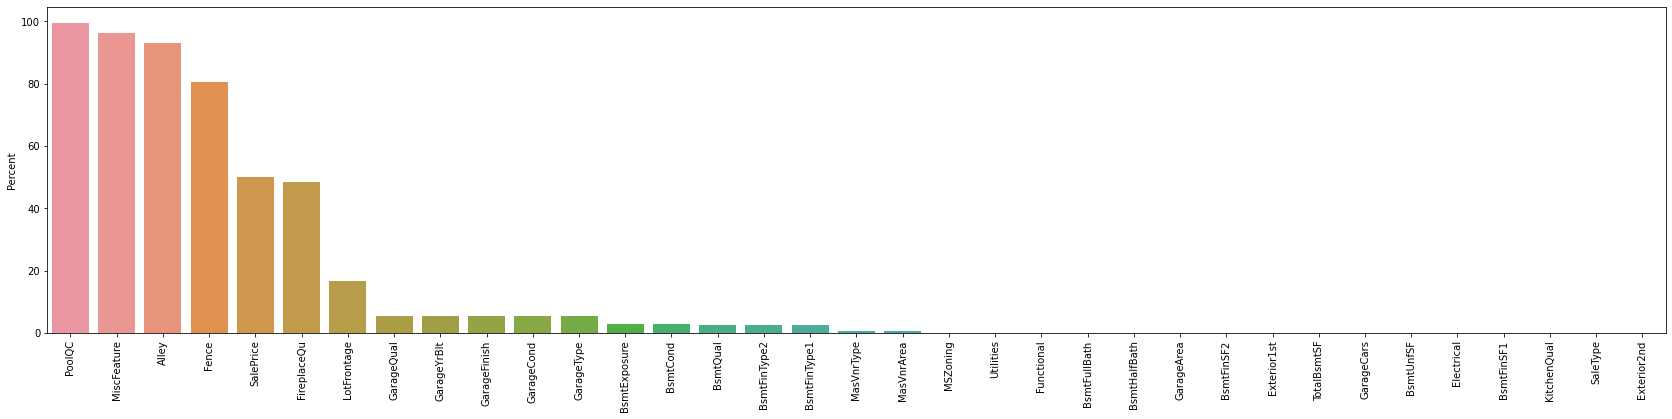

In [11]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent =total/len(data)*100
    missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
    plt.figure(figsize=(29,6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data[missing_data['Percent']>0].index, y=missing_data[missing_data['Percent']>0].Percent)
missing_data(data)

Now drop columns which have high number of missing values

In [12]:
def drop_columns(data):
    drop_columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']
    return data.drop(drop_columns,1)
data=drop_columns(data)

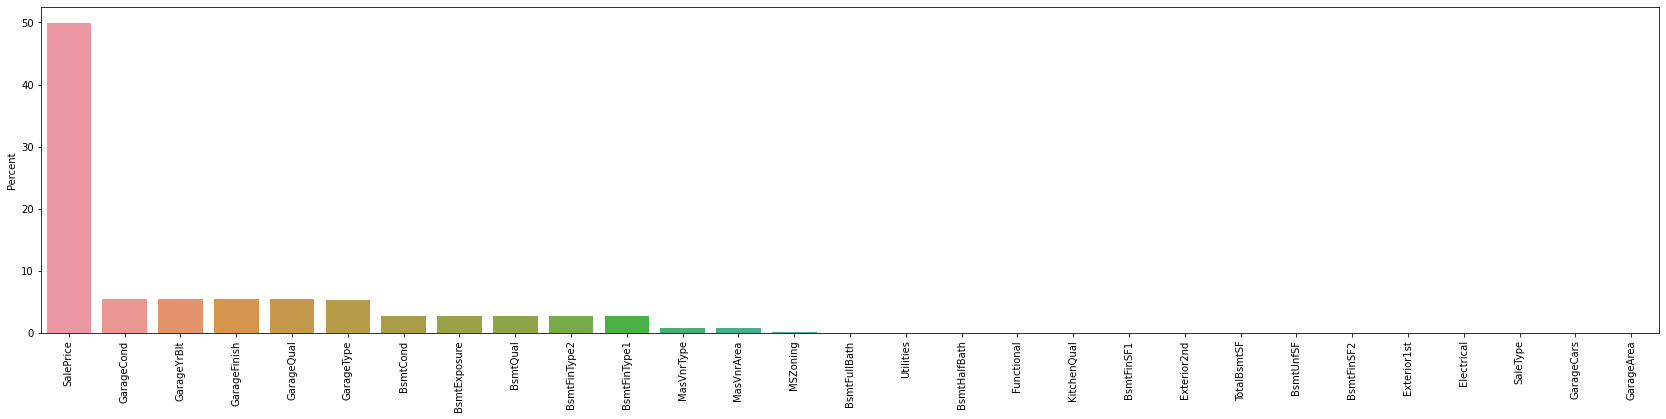

In [13]:
missing_data(data)

Salesprice have null values because in our test data the saleprice column is not present so at the time of concat the null saleprice is created so neglect this at that time.

Now you can see that there is a lots more columns with null values so we are going to deal with that by replacing it with mean if its type of int/float and mode if its type of object

In [14]:
def full_nan_by_mean_mod(data):
    nan_columns=data.columns[data.isnull().any()]
    for i in nan_columns:
        if(data[i].dtypes=="object"):
            data[i]=data[i].fillna(data[i].mode()[0])
        else:
            data[i]=data[i].fillna(data[i].mean())
    return data

In [15]:
full_nan_by_mean_mod(data)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,180921.19589
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,180921.19589


In [16]:
##All the missing values is replaced
data.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 75, dtype: int64

# categorical data

In [17]:
categorical = (data.dtypes == "object")
categorical_list = list(categorical[categorical].index)
print(categorical_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Now encode all the catagorical data with the help of LabelEncoder

In [18]:
def encodee():
    for i in categorical_list:
        encode=LabelEncoder()
        data[i]=encode.fit_transform(data[i])
encodee()

In [40]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000.0


# Spit data in train and test

In [20]:
data.shape

(2919, 75)

In [21]:
train_data=data[:1460]
test_data=data[1460:]

In [22]:
print(train_data.shape)
print(test_data.shape)

(1460, 75)
(1459, 75)


In [23]:
X = train_data.drop(['SalePrice'],1)
y = train_data['SalePrice']

In [24]:
test_data=test_data.drop(['SalePrice'],1)

# Scale the data now

In [25]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
test_data=scaler.transform(test_data)

# NOW OUR DATA IS READY FOR APPYLYING ML MODELS

# Finding best model

In [27]:
lc=[CatBoostRegressor(), xgboost.XGBRFRegressor(), LinearRegression(), KNeighborsRegressor(), LogisticRegression(), DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(random_state=58,n_estimators=500)]
modelss=['CatBoostRegressor', 'xgboost', 'linearRegression', 'KNeighborsRegressor', 'LogisticRegression', 'DecisionTreeRegressor', 'RandomForestRegressor','GradientBoostingRegressor']

In [28]:
def evalu():
    X1=X[:1350]
    y1=y[:1350]
    X2=X[1350:]
    y2=y[1350:]
    i=0
    for m in lc:
        model=m
        model.fit(X1, y1)
        predicted=model.predict(X2)
        print(modelss[i])
        print(model.score(X2,y2))
        i=i+1
evalu()

Learning rate set to 0.041172
0:	learn: 77797.6154489	total: 109ms	remaining: 1m 48s
1:	learn: 76024.4621364	total: 116ms	remaining: 57.8s
2:	learn: 74041.0114498	total: 120ms	remaining: 39.8s
3:	learn: 72148.6492259	total: 124ms	remaining: 30.8s
4:	learn: 70306.0937572	total: 128ms	remaining: 25.5s
5:	learn: 68725.9774004	total: 132ms	remaining: 21.9s
6:	learn: 67131.6805838	total: 136ms	remaining: 19.3s
7:	learn: 65507.3304371	total: 140ms	remaining: 17.4s
8:	learn: 63899.7412016	total: 144ms	remaining: 15.9s
9:	learn: 62354.3908092	total: 148ms	remaining: 14.7s
10:	learn: 60947.0653974	total: 152ms	remaining: 13.7s
11:	learn: 59478.2873247	total: 156ms	remaining: 12.8s
12:	learn: 58198.9276644	total: 160ms	remaining: 12.2s
13:	learn: 57014.5434037	total: 164ms	remaining: 11.6s
14:	learn: 55831.7541250	total: 168ms	remaining: 11s
15:	learn: 54688.4297440	total: 172ms	remaining: 10.6s
16:	learn: 53593.4680417	total: 176ms	remaining: 10.2s
17:	learn: 52495.9971237	total: 180ms	remainin

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
0.0
DecisionTreeRegressor
0.7812826180719774
RandomForestRegressor
0.9034083459119917
GradientBoostingRegressor
0.9116260509331879


# CatBoostRegressor model is best among them

# Parameters we use in model is "random_state = 58, n_estimators = 500, loss ='huber', max_depth = 3, max_features = 25" we find this parameters by parameter tuning 

In [35]:
model = CatBoostRegressor(random_state=58,n_estimators=500,max_depth=3, learning_rate=1)

# Fit model

In [36]:
model.fit(X, y)

0:	learn: 48252.3685387	total: 7.26ms	remaining: 3.62s
1:	learn: 43308.5967300	total: 31.8ms	remaining: 7.93s
2:	learn: 39781.0810098	total: 34.5ms	remaining: 5.71s
3:	learn: 37175.3237932	total: 36.8ms	remaining: 4.57s
4:	learn: 35665.3830267	total: 39.1ms	remaining: 3.87s
5:	learn: 32877.6507917	total: 41.7ms	remaining: 3.43s
6:	learn: 31521.1531318	total: 46.1ms	remaining: 3.24s
7:	learn: 30659.0224404	total: 48.2ms	remaining: 2.96s
8:	learn: 29405.6500492	total: 50.4ms	remaining: 2.75s
9:	learn: 28019.1342156	total: 52.6ms	remaining: 2.58s
10:	learn: 27668.7743437	total: 54.7ms	remaining: 2.43s
11:	learn: 27081.4637745	total: 57ms	remaining: 2.32s
12:	learn: 26286.6657941	total: 59.7ms	remaining: 2.24s
13:	learn: 25257.5124114	total: 62.1ms	remaining: 2.15s
14:	learn: 24522.8717893	total: 64.3ms	remaining: 2.08s
15:	learn: 23760.6160026	total: 66.7ms	remaining: 2.02s
16:	learn: 23234.0583753	total: 68.9ms	remaining: 1.96s
17:	learn: 22829.4722775	total: 71.1ms	remaining: 1.9s
18:	l

# Get predictions

In [38]:
preds = model.predict(test_data)

preds

array([150612.43190644, 195577.34735922, 201285.73943855, ...,
       137639.49917448, 128209.54835522, 246385.68623465])

In [39]:
indexes=[i for i in range(1461,2920 ,1)]
my_submission = pd.DataFrame(indexes,columns=['Id'])
my_submission['SalePrice'] = preds
my_submission.to_csv('submission_ad_reg.csv', index=False)